# **Loading Dataset**

In [ ]:
import pandas as pd

nasa_df = pd.read_csv("nasa.csv")

print(nasa_df.head())

   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762        

# **Data preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

nasa_df = pd.read_csv("nasa.csv")

categorical_cols = ['Orbiting Body', 'Equinox']
numerical_cols = nasa_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

X = nasa_df.drop(columns=["Hazardous"])
y = nasa_df["Hazardous"]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed_df = pd.DataFrame(X_preprocessed)

print(X_preprocessed_df.head())

         0         1         2         3         4         5         6   \
0 -0.693150 -0.460071 -0.818540 -2.203207  0.277694  0.476904 -1.811763   
1  0.304192 -2.071261 -1.829049 -0.196947  0.404273  0.337610  1.171755   
2  0.014228  1.446778  2.663526 -0.200534 -2.103022 -2.365363 -0.096232   
3 -2.039890 -0.718712  0.097973 -0.972221  0.321273 -0.321015 -0.570008   
4 -0.312831 -1.517848 -0.703017 -2.091346  0.488106 -0.302666 -0.146914   

         7         8         9   ...            27            28  \
0  2.189444  0.303156 -0.196594  ...  1.022508e-11 -3.577530e-13   
1 -0.631356  0.691116  0.603633  ... -1.829487e-11  4.913615e-12   
2  0.640978  0.814891  0.575091  ...  1.871518e-11 -4.683131e-12   
3  0.124615 -1.568313 -1.659214  ... -4.357747e-12 -5.525291e-13   
4 -0.235401 -0.663667 -0.424785  ...  1.741265e-11  2.131740e-12   

             29            30            31            32            33  \
0 -9.682940e-14  6.976106e-15 -2.266740e-14  1.077039e-15  4.0204

# **Data Visualization**

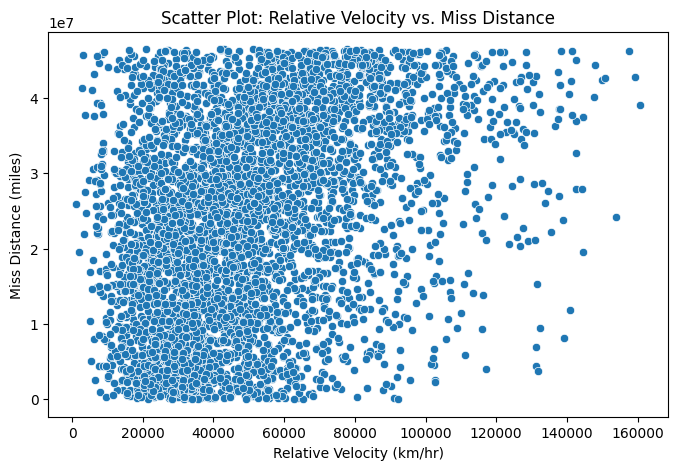

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Relative Velocity vs. Miss Distance (Miles)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Relative Velocity km per hr', y='Miss Dist.(miles)', data=nasa_df)
plt.title('Scatter Plot: Relative Velocity vs. Miss Distance')
plt.xlabel('Relative Velocity (km/hr)')
plt.ylabel('Miss Distance (miles)')
plt.show()

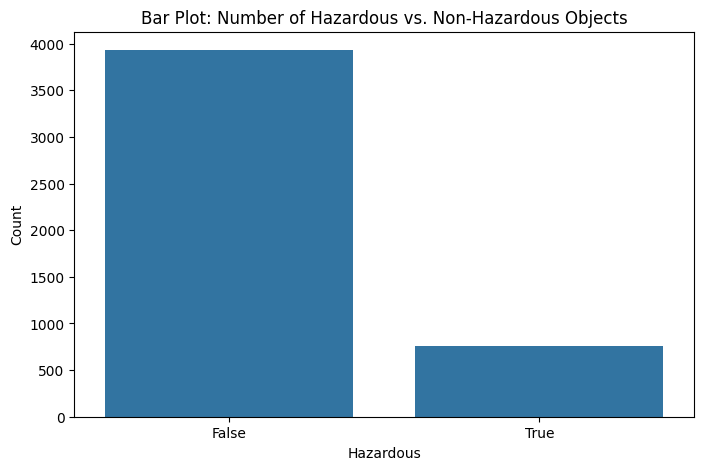

In [ ]:
# Bar Plot: Number of hazardous vs. non-hazardous objects
plt.figure(figsize=(8, 5))
sns.countplot(x='Hazardous', data=nasa_df)
plt.title('Bar Plot: Number of Hazardous vs. Non-Hazardous Objects')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

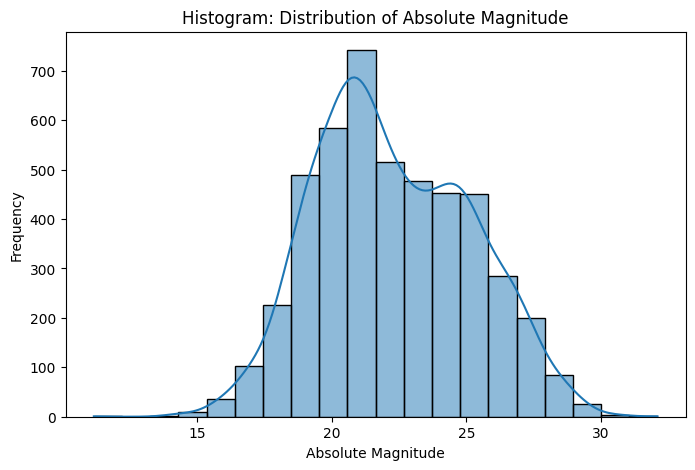

In [ ]:
# Histogram: Distribution of Absolute Magnitude
plt.figure(figsize=(8, 5))
sns.histplot(x='Absolute Magnitude', data=nasa_df, bins=20, kde=True)
plt.title('Histogram: Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

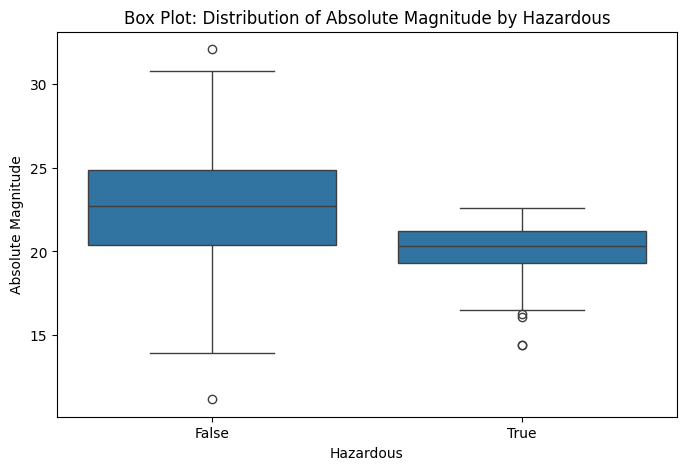

In [ ]:
# Box Plot: Distribution of Absolute Magnitude by Hazardous
plt.figure(figsize=(8, 5))
sns.boxplot(x='Hazardous', y='Absolute Magnitude', data=nasa_df)
plt.title('Box Plot: Distribution of Absolute Magnitude by Hazardous')
plt.xlabel('Hazardous')
plt.ylabel('Absolute Magnitude')
plt.show()

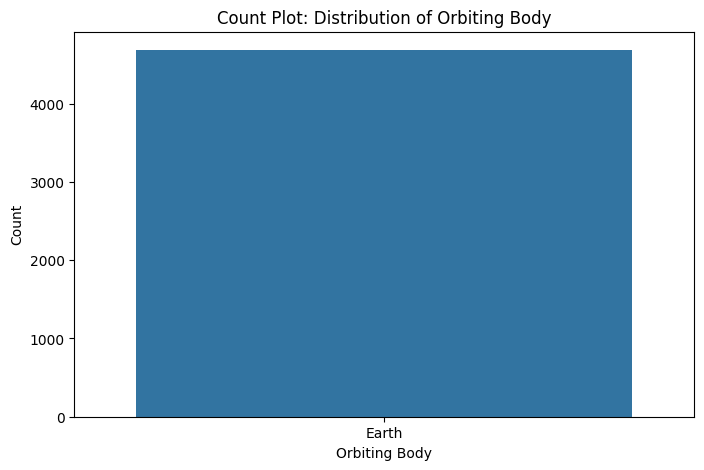

In [ ]:
# Count Plot: Distribution of Orbiting Body
plt.figure(figsize=(8, 5))
sns.countplot(x='Orbiting Body', data=nasa_df)
plt.title('Count Plot: Distribution of Orbiting Body')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.show()

# **Checking for class imbalance**

In [ ]:
# Checking class distribution
class_distribution = nasa_df['Hazardous'].value_counts()
print("Class Distribution:\n", class_distribution)

# Calculating the imbalance ratio
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("\nImbalance Ratio:", imbalance_ratio)

Class Distribution:
 Hazardous
False    3932
True      755
Name: count, dtype: int64

Imbalance Ratio: 5.207947019867549


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Creating an oversampler object
oversampler = RandomOverSampler(random_state=42)

# Resampling the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Checking the class distribution after oversampling
class_distribution_resampled = pd.Series(y_resampled).value_counts()
print("Class Distribution after Oversampling:\n", class_distribution_resampled)

# Calculating the imbalance ratio after oversampling
imbalance_ratio_resampled = class_distribution_resampled[0] / class_distribution_resampled[1]
print("\nImbalance Ratio after Oversampling:", imbalance_ratio_resampled)

Class Distribution after Oversampling:
 Hazardous
True     3932
False    3932
Name: count, dtype: int64

Imbalance Ratio after Oversampling: 1.0


# **Different Models.**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

numerical_cols = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)',
                  'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)',
                  'Est Dia in Feet(max)', 'Relative Velocity km per sec', 'Relative Velocity km per hr',
                  'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)',
                  'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
                  'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis',
                  'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
                  'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

categorical_cols = ['Orbiting Body', 'Equinox']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Defining models
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Evaluating each model using cross-validation
for model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipe, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}, Std = {scores.std()}")

LogisticRegression: Mean Accuracy = 0.9436695735446603, Std = 0.009269685600219336
DecisionTreeClassifier: Mean Accuracy = 0.9987284633016763, Std = 0.0006963312123769412
RandomForestClassifier: Mean Accuracy = 0.9984742530197075, Std = 0.0015880478063314374
SVC: Mean Accuracy = 0.9582936610001148, Std = 0.011980839824947066
KNeighborsClassifier: Mean Accuracy = 0.9099734061913104, Std = 0.0211449112022403
GaussianNB: Mean Accuracy = 0.9225604952530698, Std = 0.01970908774585682
AdaBoostClassifier: Mean Accuracy = 0.9980928162746345, Std = 0.0016577755639421868
GradientBoostingClassifier: Mean Accuracy = 0.9979656706929434, Std = 0.0018599795090054208


# **Cross-validation and grid search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for each model with different hyperparameters
param_grid = {
    LogisticRegression.__name__.lower(): {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    DecisionTreeClassifier.__name__.lower(): {
        'classifier__max_depth': [None, 5, 10, 15, 20],
    },
    RandomForestClassifier.__name__.lower(): {
        'classifier__n_estimators': [100, 200, 300],
    },
    SVC.__name__.lower(): {
        'classifier__C': [0.1, 1, 10],
    },
    KNeighborsClassifier.__name__.lower(): {
        'classifier__n_neighbors': [3, 5, 7],
    },
    GaussianNB.__name__.lower(): {},
    AdaBoostClassifier.__name__.lower(): {
        'classifier__n_estimators': [50, 100, 200],
    },
    GradientBoostingClassifier.__name__.lower(): {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.5]
    }
}

# Defining grid search for each model
grid_searches = []
for model in models:
    model_name_lower = model.__class__.__name__.lower()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipe, param_grid=param_grid[model_name_lower], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    grid_searches.append(grid_search)

for i, grid_search in enumerate(grid_searches):
    model_name = models[i].__class__.__name__
    print(f"{model_name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

LogisticRegression: Best Parameters - {'classifier__C': 0.1}, Best Score - 0.9459584366593388
DecisionTreeClassifier: Best Parameters - {'classifier__max_depth': None}, Best Score - 0.9988556088833673
RandomForestClassifier: Best Parameters - {'classifier__n_estimators': 200}, Best Score - 0.9982199618563256
SVC: Best Parameters - {'classifier__C': 10}, Best Score - 0.9795285098893703
KNeighborsClassifier: Best Parameters - {'classifier__n_neighbors': 3}, Best Score - 0.9307000771608683
GaussianNB: Best Parameters - {}, Best Score - 0.9225604952530698
AdaBoostClassifier: Best Parameters - {'classifier__n_estimators': 200}, Best Score - 0.9986013986013986
GradientBoostingClassifier: Best Parameters - {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}, Best Score - 0.9989828353464716


# **Accuracy measures**

In [ ]:
from sklearn.metrics import classification_report

for i, grid_search in enumerate(grid_searches):
    model_name = models[i].__class__.__name__
    y_pred = grid_search.predict(X_resampled)
    print(f"{model_name}:")
    print(classification_report(y_resampled, y_pred))

LogisticRegression:
              precision    recall  f1-score   support

       False       0.97      0.92      0.95      3932
        True       0.93      0.98      0.95      3932

    accuracy                           0.95      7864
   macro avg       0.95      0.95      0.95      7864
weighted avg       0.95      0.95      0.95      7864

DecisionTreeClassifier:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3932
        True       1.00      1.00      1.00      3932

    accuracy                           1.00      7864
   macro avg       1.00      1.00      1.00      7864
weighted avg       1.00      1.00      1.00      7864

RandomForestClassifier:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3932
        True       1.00      1.00      1.00      3932

    accuracy                           1.00      7864
   macro avg       1.00      1.00      1.00      7864
weight

# **Feature Extraction**

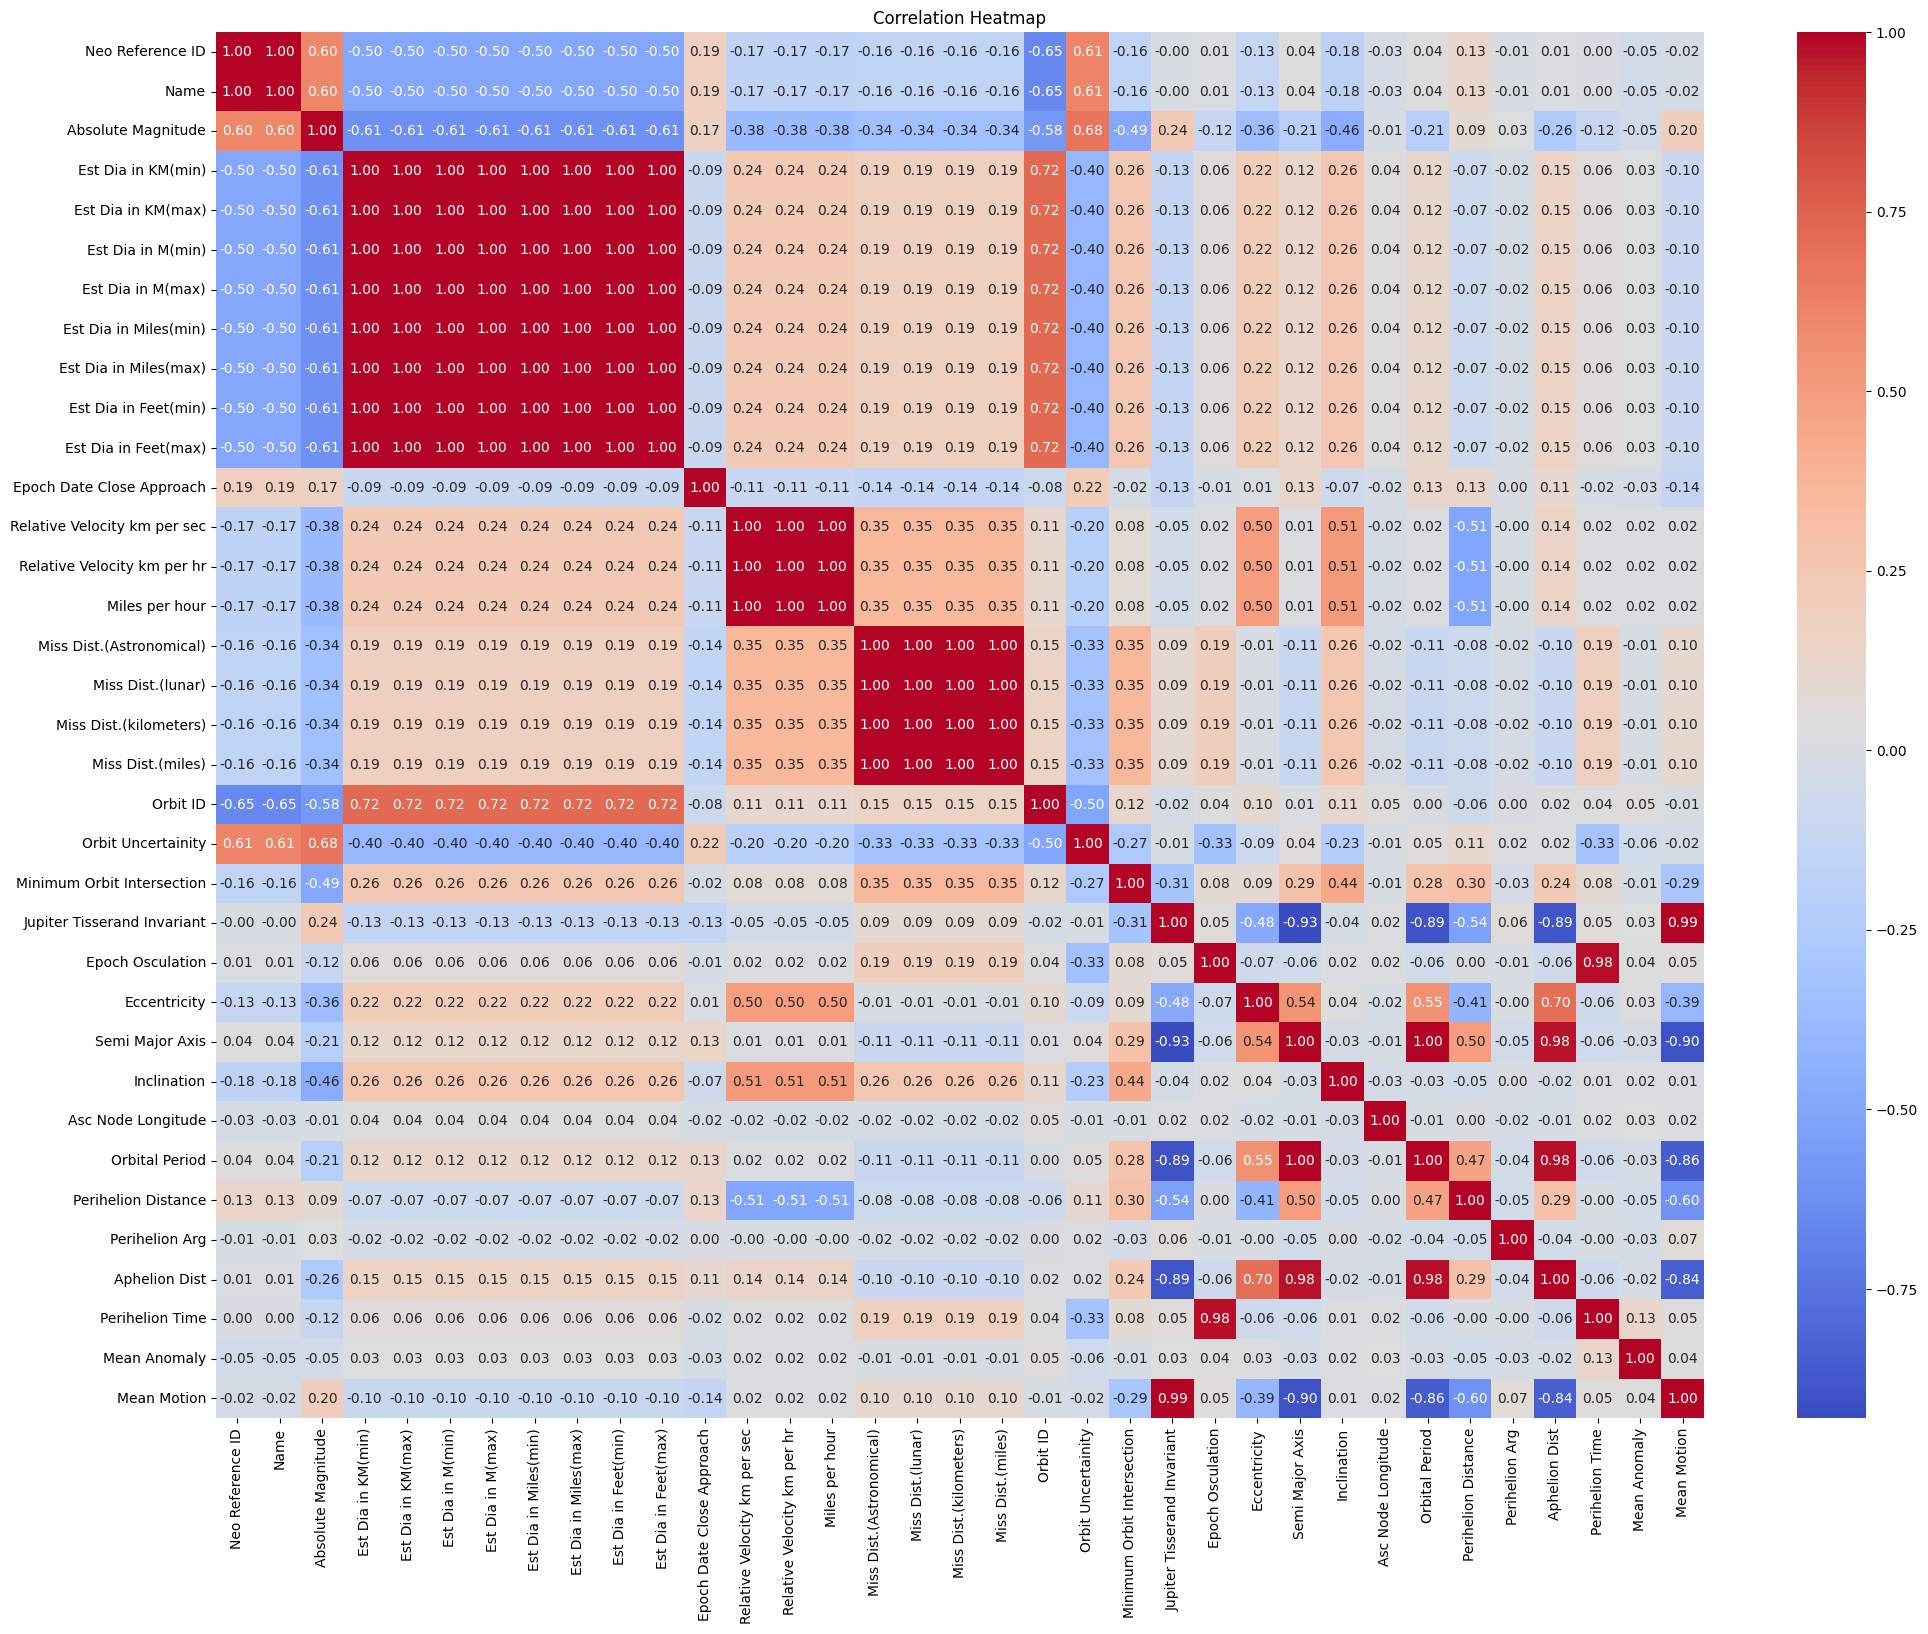

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = nasa_df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

numeric_df = nasa_df.select_dtypes(include=['number'])

X_numeric = numeric_df
y_numeric = nasa_df["Hazardous"]

# Initializing model for RFE
model = RandomForestClassifier()

# Initializing RFE
rfe = RFE(model, n_features_to_select=10)

rfe.fit(X_numeric, y_numeric)

selected_features = X_numeric.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in M(min)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Minimum Orbit Intersection', 'Inclination', 'Perihelion Distance'],
      dtype='object')


# **Explainable AI models**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=7ef580c5d33fdc480c5d94902cfc96a11ea365741c4c60bd28e4416df81e9f22
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular

nasa_df = pd.read_csv("nasa.csv")

X = nasa_df.drop(columns=["Hazardous"])
y = nasa_df["Hazardous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object']).columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(onehot_encoder.transform(X_test[categorical_cols]))

# Reindexing encoded dataframes to match original indices
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

# Concatenating encoded features with numeric features
X_train_processed = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded], axis=1)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_processed, y_train)

# Initializing LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_processed.values, mode="classification", feature_names=X_train_processed.columns.tolist())

observation_idx = 0  # Index of the observation we want to explain
exp = explainer.explain_instance(X_test_processed.values[observation_idx], rf_classifier.predict_proba, num_features=5)

print(exp.as_list())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('0.01 < Minimum Orbit Intersection <= 0.05', 0.09822966171388549), ('20.20 < Absolute Magnitude <= 21.90', 0.03738872632182891), ('0.07 < Est Dia in Miles(min) <= 0.15', 0.034270567820479644), ('0.11 < Est Dia in KM(min) <= 0.24', 0.033757951776025676), ('Orbit ID > 31.00', 0.02974692583454135)]


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


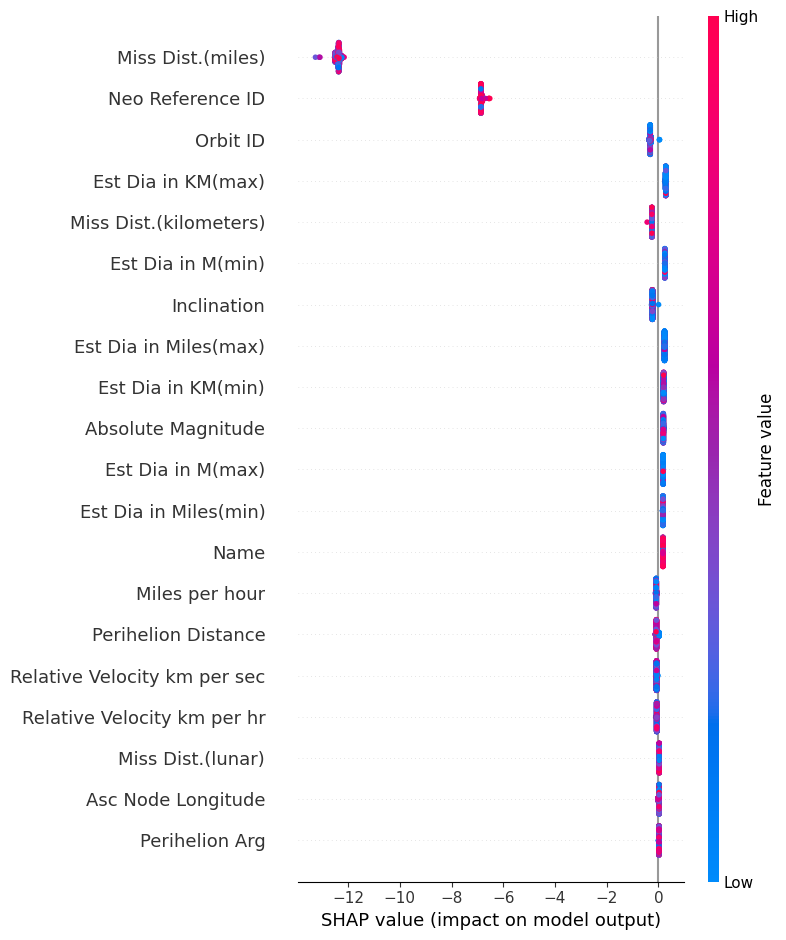

In [ ]:
import shap

# Extracting the best estimator from the grid search
best_estimator = grid_search.best_estimator_['classifier']

# Initializing SHAP explainer
explainer = shap.Explainer(best_estimator)

# Explaining the model's predictions
shap_values = explainer.shap_values(X_test_processed)

shap.summary_plot(shap_values, X_test_processed)

# **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Defining the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Generating predictions
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/10
94/94 [==============================] - 3s 17ms/step - loss: 7530770944.0000 - accuracy: 0.6539 - val_loss: 696857792.0000 - val_accuracy: 0.8440
Epoch 2/10
94/94 [==============================] - 1s 11ms/step - loss: 1045280512.0000 - accuracy: 0.7046 - val_loss: 120974944.0000 - val_accuracy: 0.8440
Epoch 3/10
94/94 [==============================] - 1s 11ms/step - loss: 360386304.0000 - accuracy: 0.7079 - val_loss: 24347896.0000 - val_accuracy: 0.8440
Epoch 4/10
94/94 [==============================] - 1s 13ms/step - loss: 93665344.0000 - accuracy: 0.7156 - val_loss: 2333012.0000 - val_accuracy: 0.8440
Epoch 5/10
94/94 [==============================] - 1s 14ms/step - loss: 8014561.5000 - accuracy: 0.7823 - val_loss: 0.6109 - val_accuracy: 0.8440
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.5954 - accuracy: 0.8363 - val_loss: 0.5760 - val_accuracy: 0.8440
Epoch 7/10
94/94 [==============================] - 1s 13ms/step - loss: 0.5664 - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
